In [1]:
from google.colab import drive
drive.mount( '/content/drive' )

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Install Library

In [2]:
import sys
sys.version

'3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]'

In [3]:
!pip list

Package                       Version
----------------------------- ---------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
array-record                  0.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
attrs                         23.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
blosc2                        2.0.0
bokeh                         2.4.3
branca                        0.6.0
build                         0.10.0
CacheControl                  0.12.11
ca

In [4]:
pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip show 'sktime'

Name: sktime
Version: 0.19.1
Summary: A unified framework for machine learning with time series
Home-page: 
Author: 
Author-email: sktime developers <sktime.toolbox@gmail.com>
License: BSD 3-Clause License
        
        Copyright (c) 2019 - 2020 The sktime developers.
        
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        * Redistributions of source code must retain the above copyright notice, this
          list of conditions and the following disclaimer.
        
        * Redistributions in binary form must reproduce the above copyright notice,
          this list of conditions and the following disclaimer in the documentation
          and/or other materials provided with the distribution.
        
        * Neither the name of the copyright holder nor the names of its
          contributors may be used to endorse

In [6]:
!pip install statsmodels --upgrade  #statsmodels version 0.14.0 필요

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
pip install tbats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import Library

In [8]:
# Imports for data loading and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Imports for time series analysis
from statsmodels.tsa.seasonal import MSTL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Import for time series forecasting
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import *
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.tbats import TBATS
import tbats

### Load Data

In [9]:
data = pd.read_csv( '/content/drive/MyDrive/BI 공모전/DATA/한국전력거래소_5분단위 전력수급현황_20220407.csv', encoding = 'cp949' )

In [10]:
data.head()

,기준일시,공급능력(MW),현재수요(MW),최대예측수요(MW),공급예비력(MW),공급예비율(퍼센트),운영예비력(MW),운영예비율(퍼센트)
0,2012-06-01 00:00,64355.0,51726.33,59400,12628.67,24.41439,12628.67,24.41439
1,2012-06-01 00:05,64355.0,51342.53,60800,13012.47,25.34442,13012.47,25.34442
2,2012-06-01 00:10,64355.0,51583.17,60800,12771.83,24.75969,12771.83,24.75969
3,2012-06-01 00:15,64355.0,51631.69,60800,12723.31,24.64245,12723.31,24.64245
4,2012-06-01 00:20,64355.0,51252.66,60800,13102.35,25.56423,13102.35,25.56423


### Data Preprocessing

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035067 entries, 0 to 1035066
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   기준일시        1035067 non-null  object 
 1   공급능력(MW)    1035067 non-null  float64
 2   현재수요(MW)    1035067 non-null  float64
 3   최대예측수요(MW)  1035067 non-null  int64  
 4   공급예비력(MW)   1035067 non-null  float64
 5   공급예비율(퍼센트)  1035067 non-null  float64
 6   운영예비력(MW)   1035067 non-null  float64
 7   운영예비율(퍼센트)  1035067 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 63.2+ MB


In [57]:
data.iloc[ data.index[ data['기준일시'] == '2021-01-01 00:00' ][0] ]

기준일시          2021-01-01 00:00
공급능력(MW)               98798.8
현재수요(MW)               66640.1
최대예측수요(MW)               64900
공급예비력(MW)              32154.1
공급예비율(퍼센트)             48.2503
운영예비력(MW)              8698.71
운영예비율(퍼센트)             13.0533
Name: 902418, dtype: object

In [58]:
data.index[ data['기준일시'] == '2021-01-01 00:00' ][0]

902418

In [59]:
data.iloc[ data.index[ data['기준일시'] == '2021-06-30 23:55' ][0] ]

기준일시          2021-06-30 23:55
공급능력(MW)               88577.8
현재수요(MW)               61820.0
최대예측수요(MW)               75000
공급예비력(MW)              26757.8
공급예비율(퍼센트)             43.2833
운영예비력(MW)              9062.32
운영예비율(퍼센트)             14.6592
Name: 954521, dtype: object

In [60]:
data.index[ data['기준일시'] == '2021-06-30 23:55' ]

Int64Index([954521], dtype='int64')

In [18]:
954521-902418

52103

In [14]:
a = data.index[ data['기준일시'] == '2021-01-01 00:00' ][0]
b = data.index[ data['기준일시'] == '2021-06-30 23:55' ][0]

In [45]:
len(list(data.iloc[ 902418:954521+1, 2 ]))

52104

In [53]:
# from pandas.errors import DatabaseError
# 원하는 기간 현재 수요 데이터를 가져오는 함수

def data_years( data, _start, _end ) :

    Start = data.index[ data['기준일시'] == _start ][0]
    End = data.index[ data['기준일시'] == _end ][0]

    data_new = list( data.iloc[ Start : (End + 1), 2 ] )

    return pd.DataFrame( data = data_new, columns = ['현재수요(MW)'], index = pd.date_range( start = _start, end = _end, freq = '5min' ) )

In [54]:
data_2y = data_years( data, '2021-01-01 00:00', '2021-06-30 23:55' )

ValueError: ignored

In [42]:
data_2y

,현재수요(MW)
2021-01-01 00:00:00,66640.1
2021-01-01 00:05:00,66154.8
2021-01-01 00:10:00,65876.4
2021-01-01 00:15:00,65518.8
2021-01-01 00:20:00,65397.3
...,...
2021-06-30 21:35:00,63434.0
2021-06-30 21:40:00,62868.2
2021-06-30 21:45:00,62373.1
2021-06-30 21:50:00,62002.5


In [16]:
len( data_2y )

52104

### Applying Multiple Seasonal Trend Decomposition

MSTL( Moving Seasonal-Trend decomposition using Loess )은 시계열 데이터에서 계절성, 추세 및 불규칙 요소를 분해하는데 사용된다.


*   period : 계절성의 주기를 지정하는 매개변수. 데이터가 가진 계절성의 주기의 길이를 반영해야한다. ex) 월간 : period = 12
*   seasonal : 계절성을 추정하기 위한 로컬 회귀의 차원을 지정하는 매개변수. 일반적으로 작은 값일수록 부드러운 추세. default = 7
*   trend : 추세를 추정하기 위한 로컬 회귀의 차원을 지정하는 매개변수. 작은 값일수록 부드러운 추세. default = 7
*   low_pass : 계절성 및 추세의 제거를 위해 사용되는 저주파 통과 필터의 차원을 지정하는 매개변수. 작은값으로 설정하면 계절성 및 추세가 더 많이 제거된다. default = None






In [ ]:
mstl = MSTL( data_2y['현재수요(MW)'], periods = [288*7, 288*30], iterate = 1 ) # 주기성 설정 얘기해봐야할 듯
res = mstl.fit()

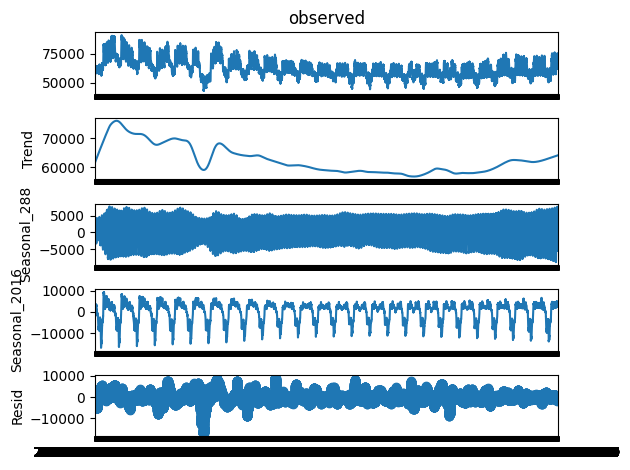

In [ ]:
res.plot()
plt.tight_layout()
plt.show()

### Plotting the Autocorrelation Function

plot_acf : 자기상관 함수를 그래프로 시각화하는 함수

*   lags : 자기상관 함수를 계산할 시점 간격(lag)의 범위를 지정한다. default는 None으로 설정되어 자동으로 최대 lag 값을 결정한다.
*   alpha : 신뢰구간의 신뢰수준을 나타내는 파라미터. default = 0.05



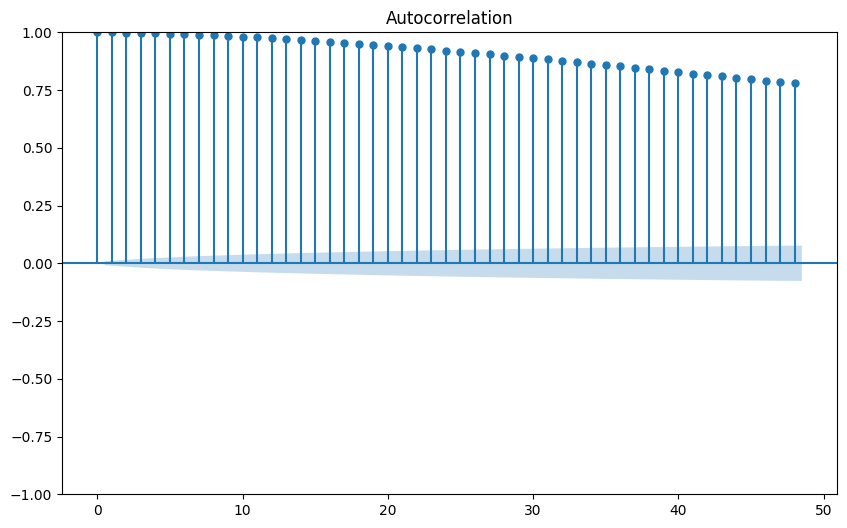

In [ ]:
# acf 함수 출력
fig, ax = plt.subplots( figsize = (10,6) )

plot_acf( data_2y['현재수요(MW)'], lags = None, ax = ax ) # lags 값을 뭐로 설정해야하는가..?
plt.show()

### Creating a Utility Metrics Function

In [17]:
# 성능지표 출력 함수
def print_metrics( y_true, y_pred, model_name ) :
    mae_ = mean_absolute_error( y_true, y_pred )
    rmse_ = mean_squared_error( y_true, y_pred, square_root = True )
    mape_ = mean_absolute_percentage_error( y_true, y_pred )
    smape_ = mean_absolute_percentage_error( y_true, y_pred, symmetric = True )

    dict_ = { 'MAE' : mae_, 'RMSE' : rmse_, 'MAPE' : mape_, 'SMAPE' : smape_ }

    df = pd.DataFrame( dict_, index = [model_name] )

    return( df.round( decimals = 2 ) )

### Creating a Baseline Forecasting Model

temporal_train_test_split
> 입력 데이터를 시계열 데이터로 다루기 위해 추가적인 처리를 수행.

> 시간 순서를 유지하면서 데이터를 분할하여 훈련 세트와 테스트 세트로 반환

*   y : time series in sktime compatible data container format
*   test_size : float( 0.0 ~ 1.0 ) --> test set의 비율 // int --> test set의 개수

ForecastingHorizon
> 시계열 예측 작업에서의 예측 가간(예측할 시점)을 표현하는데 사용

*   is_relative : 예측 기간이 상대적인지 절대적인지를 나타내는 불리언 값
    > True : 상대적으로 정의 --> 상대적인 예측기간은 기준 시점으로부터의 상대적인 간격을 나타낸다.

    > False : 절대적으로 정의 --> 절대적인 예측기간은 실제 시간 값으로 구성
*   freq : 예측범위의 주기 정보를 지정
    > pandas의 주기 문자열( 'D','H','W' 등) 이나, 'DateOffset' 객체를 허용


In [18]:
y = data_2y['현재수요(MW)']
y_train, y_test = temporal_train_test_split( y, test_size = 0.2 )
fh = ForecastingHorizon( y_test.index, is_relative = False, freq = '5min' )
#forecaster = NaiveForecaster( strategy = 'mean' )
#forecaster.fit( y_train )
#y_pred = forecaster.predict( fh )

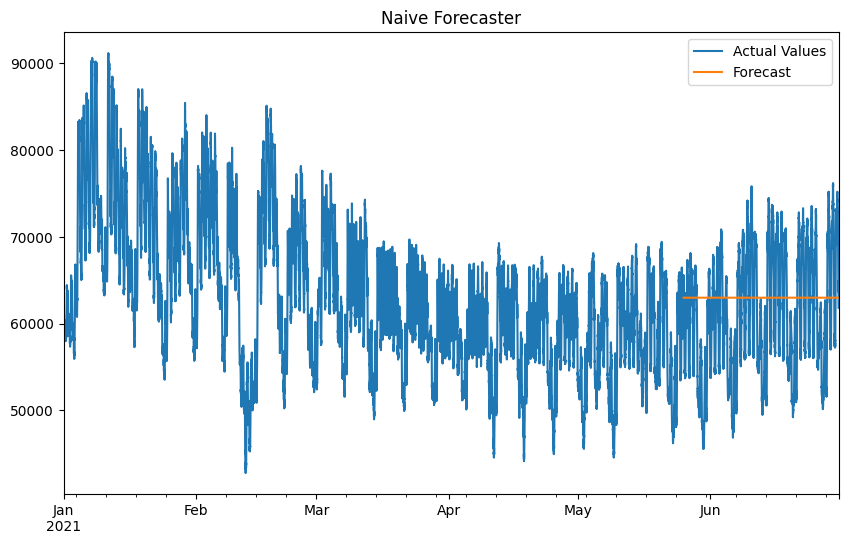

In [ ]:
fig, ax = plt.subplots( figsize = (10,6) )
data_2y[ '현재수요(MW)' ].plot( title = 'Naive Forecaster', ax = ax )
y_pred.plot( ax = ax )
ax.legend( ['Actual Values', 'Forecast'] )
plt.show()

In [ ]:
print_metrics( y_test, y_pred, 'Naive Forecaster' )

,MAE,RMSE,MAPE,SMAPE
Naive Forecaster,6295.69,7305.3,0.11,0.1


### Creating the TBATS Forecasting Model

*   ues_arma_errors : ARMA 오차를 사용하여 모델을 구성할지 여부 지정. default = True
*   use_box_cox : Box-Cox 변환을 사용하여 시계열 데이터를 변환할지 여부를 지정. default = True
*   use_trend : 추세 구성 요소를 사용하여 모델을 구성할지 여부 지정. default = True
*   use_seasonal : 계절성 구성 요소를 사용하여 모델을 구성할지 여부 지정. default = True
*   n_jobs : 병렬 처리를 위해 사용할 작업 스레드 수를 지정. default = 1( cpu 코어 개수 )
*   sp : 계절성 주기를 지정하는 값. 지정하지 않을 경우, 주기를 자동으로 추정하나 주기성이 잘 알려져있는 경우 매개변수를 설정해주는 것이 좋음







In [19]:
forecaster = TBATS( sp = [288, 288*7] )
forecaster.fit( y_train )
y_pred = forecaster.predict( fh )

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-482d3f8bb90c>", line 2, in <cell line: 2>
    forecaster.fit( y_train )
  File "/usr/local/lib/python3.10/dist-packages/sktime/forecasting/base/_base.py", line 348, in fit
    self._fit(y=y_inner, X=X_inner, fh=fh)
  File "/usr/local/lib/python3.10/dist-packages/sktime/forecasting/base/adapters/_tbats.py", line 101, in _fit
    self._forecaster = self._forecaster.fit(y)
  File "/usr/local/lib/python3.10/dist-packages/tbats/abstract/Estimator.py", line 98, in fit
    best_model = self._do_fit(y)
  File "/usr/local/lib/python3.10/dist-packages/tbats/tbats/TBATS.py", line 76, in _do_fit
    non_seasonal_model = self._choose_model_from_possible_component_settings(y, components_grid=components_grid)
  File "/usr/local/lib/python3.10/dist-packages/tbats/abstract/Estimator.py

TypeError: ignored

In [ ]:
fig, ax = plt.subplots( figsize = (10,6) )
data_2y[ '현재수요(MW)' ].plot( title = 'TBATS Forecaster', xlabel = '', ax = ax )
y_pred.plot( ax = ax )
ax.legend( ['Actual Values', 'Forecast' ] )
plt.show()

In [ ]:
print_metrics( y_test, y_pred, 'TBATS Forecaster' )